<a href="https://colab.research.google.com/github/iamkishan98/Deep-learning-assignments/blob/master/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')


In [0]:
import numpy as np
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif
import random
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
import seaborn as sn
from sklearn.naive_bayes import GaussianNB
#!pip install pycm
from pycm import *
from sklearn.neighbors import KNeighborsClassifier
import numpy
import pandas
from keras.models import Sequential
import time
from keras.layers import Dense, Input, advanced_activations
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from keras.models import Model
from keras.optimizers import nadam, adam, sgd
from keras.regularizers import l1_l2
from keras.layers import Dropout
from sklearn.model_selection import KFold 
from sklearn.utils import shuffle
from keras.models import load_model
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/phishing')


In [0]:
def Get_Data_Neural_Network(dataset):
    np.random.seed(1)
    if dataset == 1:
        dataframe = pandas.read_csv("csv_result-Phishing_Legitimate_full.csv", sep=',')
        dataframe = dataframe.drop('id', axis=1)
        dataset = dataframe.values
        # split into input (X) and output (Y) variables
        X = dataset[:,0:48].astype(float)
        Y = dataset[:,48]
        
       
    elif dataset == 2:
        dataframe = pandas.read_csv("UCI_1.csv", sep=',')
        dataframe = dataframe.drop('id', axis=1)
        dataset = dataframe.values
        # split into input (X) and output (Y) variables
        X = dataset[:,0:30].astype(float)
        Y = dataset[:,30]
        
    elif dataset == 3:
        dataframe = pandas.read_csv("UCI_2.csv", sep=',')
        dataframe = dataframe.drop('id', axis=1)
        dataset = dataframe.values
        # split into input (X) and output (Y) variables
        X = dataset[:,0:9].astype(float)
        Y = dataset[:,9]
#         np.random.seed(1)
#         (train, test, train_labels, test_labels) = train_test_split(X, 
#                                                         Y, test_size=0.3, random_state=np.random.seed(173))
    
    return X, Y

In [0]:
def get_data(num):
    
    if num == 1:
        dataset = pd.read_csv('csv_result-Phishing_Legitimate_full.csv', sep=',')
        dataset = dataset.drop('id', axis=1)
        feature_names_dataset = []
        for col in dataset.columns:
            feature_names_dataset.append(col)
        features_dataset = dataset[feature_names_dataset[:-1]].values
        labels_dataset = dataset['CLASS_LABEL'].values
        features_dataset = minmax_scale(features_dataset, axis = 0)
        (train, test, train_labels, test_labels) = train_test_split(features_dataset, 
                                            labels_dataset, test_size=0.3, random_state=np.random.seed(173))
    
    elif num == 2:
        dataset = pd.read_csv('UCI_1.csv', sep=',')
        dataset = dataset.drop('id', axis=1)
        
        feature_names_dataset = []
        for col in dataset.columns:
            feature_names_dataset.append(col)
        features_dataset = dataset[feature_names_dataset[:-1]].values
        labels_dataset = dataset['Result'].values

        (train, test, train_labels, test_labels) = train_test_split(features_dataset, 
                                            labels_dataset, test_size=0.3, random_state=np.random.seed(173))
        
    elif num == 3:
        dataset = pd.read_csv('UCI_2.csv', sep=',')
        dataset = dataset.drop('id', axis=1)
        feature_names_dataset = []
        for col in dataset.columns:
            feature_names_dataset.append(col)
        features_dataset = dataset[feature_names_dataset[:-1]].values
        labels_dataset = dataset['Result'].values
        
        (train, test, train_labels, test_labels) = train_test_split(features_dataset, 
                                            labels_dataset, test_size=0.3, random_state=np.random.seed(173))
        
    return dataset, features_dataset, labels_dataset, feature_names_dataset

In [0]:
def initialize_neural_network(dataset, input_dimensions):
    
    # Model Architecture for Dataset 1
    if dataset == 1:
        model = Sequential()
        model.add(Dense(input_dimensions, input_dim=input_dimensions, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.3))
        model.add(Dense(50, input_dim=50, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.3))
        model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
        optm = nadam(lr=0.002)
        model.compile(loss='mean_squared_error', optimizer=optm, metrics=['accuracy'])


    # Model Architecture for Dataset 2
    elif dataset == 2:
        model = Sequential()
        model.add(Dense(input_dimensions, input_dim=input_dimensions, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.2))
        model.add(Dense(50, input_dim=50, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.2))
        model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
        optm = nadam(lr=0.002)
        model.compile(loss='mean_squared_error', optimizer=optm, metrics=['accuracy'])
        
    elif dataset == 3:
        model = Sequential()
        model.add(Dense(input_dimensions, input_dim=input_dimensions, kernel_initializer='normal', activation='relu',))
        # model.add(Dropout(0.2))
        model.add(Dense(50, input_dim=50, kernel_initializer='normal', activation='relu',))
        # model.add(Dropout(0.2))
        model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
        optm = nadam(lr=0.001)
        model.compile(loss='categorical_crossentropy', optimizer=optm, metrics=['accuracy'])
        
    model.save('model.h5')
    return model

In [0]:
def train_evaluate_Neural_Network(dataset, train, train_labels, test, test_labels):
    
    kf = StratifiedKFold(n_splits=5, random_state=np.random.seed(1))
    train_accuracy = []
    test_accuracy = []
    validation_accuracy = []    
    np.random.seed(1)
    start = time.time() 
    for train_index, validation_index in kf.split(train, train_labels):
        #print("Train:", train_index, "Validation:",test_index)
        X_train, X_validation = train[train_index], train[validation_index] 
        y_train, y_validation = train_labels[train_index], train_labels[validation_index]
        
        if dataset == 3:
            encoder_train = LabelEncoder()
            encoder_train.fit(y_train)
            encoded_Y_train = encoder_train.transform(y_train)
            y_train = np_utils.to_categorical(encoded_Y_train)

            encoder_val = LabelEncoder()
            encoder_val.fit(y_validation)
            encoded_Y_val = encoder_val.transform(y_validation)
            y_validation = np_utils.to_categorical(encoded_Y_val)
        
        model = load_model('model.h5')
        model.fit(X_train, y_train, epochs=65, verbose=0)
        
        
        if dataset == 1 :
            yhat_classes = model.predict_classes(X_train, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            conf_mat = confusion_matrix(y_train, yhat_classes)
            tn, fp, fn, tp = conf_mat.ravel()
            accuracy = (tp + tn) / (tp+tn+fp+fn)
            train_accuracy.append(accuracy)
            yhat_classes = model.predict_classes(X_validation, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            validation_conf_mat = confusion_matrix(y_validation, yhat_classes)
            tn, fp, fn, tp = validation_conf_mat.ravel()
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)

        #Getting Validation Confusion Matrix
        if dataset == 2:
            
            yhat_classes = model.predict_classes(X_train, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            yhat_classes = np.where(yhat_classes == 0, -1, 1)
            conf_mat = confusion_matrix(y_train, yhat_classes)
            tn, fp, fn, tp = conf_mat.ravel()
            accuracy = (tp + tn) / (tp+tn+fp+fn)
            train_accuracy.append(accuracy)
            yhat_classes = model.predict_classes(X_validation, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            yhat_classes = np.where(yhat_classes == 0, -1, 1)
            validation_conf_mat = confusion_matrix(y_validation, yhat_classes)
            tn, fp, fn, tp = validation_conf_mat.ravel()
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)
            
        if dataset == 3:
            
            yhat_classes = model.predict_classes(X_train, verbose=0)
            yhat_classes = (encoder_train.inverse_transform(yhat_classes))
            conf_mat = ConfusionMatrix(train_labels[train_index], yhat_classes)
            fn = (conf_mat.class_stat['FN'][1]) + (conf_mat.class_stat['FN'][-1]) + (conf_mat.class_stat['FN'][0])
            tn = (conf_mat.class_stat['TN'][1]) + (conf_mat.class_stat['TN'][-1]) + (conf_mat.class_stat['TN'][0])
            fp = (conf_mat.class_stat['FP'][1]) + (conf_mat.class_stat['FP'][-1]) + (conf_mat.class_stat['FP'][0])
            tp = (conf_mat.class_stat['TP'][1]) + (conf_mat.class_stat['TP'][-1]) + (conf_mat.class_stat['TP'][0])
            accuracy = (tp + tn) / (tp+tn+fp+fn)
            train_accuracy.append(accuracy)
            
            yhat_classes = model.predict_classes(X_validation, verbose=0)
            yhat_classes = (encoder_val.inverse_transform(yhat_classes))
            validation_conf_mat = ConfusionMatrix(train_labels[validation_index], yhat_classes)
            fn = (validation_conf_mat.class_stat['FN'][1]) + (validation_conf_mat.class_stat['FN'][-1])
            + (validation_conf_mat.class_stat['FN'][0])
            tn = (validation_conf_mat.class_stat['TN'][1]) + (validation_conf_mat.class_stat['TN'][-1])
            + (validation_conf_mat.class_stat['TN'][0])
            fp = (validation_conf_mat.class_stat['FP'][1]) + (validation_conf_mat.class_stat['FP'][-1]) 
            + (validation_conf_mat.class_stat['FP'][0])
            tp = (validation_conf_mat.class_stat['TP'][1]) + (validation_conf_mat.class_stat['TP'][-1])
            + (validation_conf_mat.class_stat['TP'][0])
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)

    
    end = time.time()
    print('Time to train Neural Network on Dataset '+str(dataset)+' is: ' + str(end - start))
    if dataset == 1 or dataset == 2:
        yhat_classes_test = model.predict_classes(test, verbose=0)
        if dataset == 2:
            yhat_classes_test = np.where(yhat_classes_test == 0, -1, 1)
        test_conf_mat = confusion_matrix(test_labels, yhat_classes_test)
        tn, fp, fn, tp = test_conf_mat.ravel()
        test_acc = (tp + tn) / (tp+tn+fp+fn)
        dataset_3_confusion_mat = 0
    
    elif dataset == 3:
        encoder_test = LabelEncoder()
        encoder_test.fit(test_labels)
        encoded_Y_test = encoder_val.transform(test_labels)
        y_test = np_utils.to_categorical(encoded_Y_test)
        yhat_classes_test = model.predict_classes(test, verbose=0)
        yhat_classes_test = (encoder_test.inverse_transform(yhat_classes_test))
        test_conf_mat = ConfusionMatrix(test_labels, yhat_classes_test)
        fn = (test_conf_mat.class_stat['FN'][1]) + (test_conf_mat.class_stat['FN'][-1]) 
        + (test_conf_mat.class_stat['FN'][0])
        tn = (test_conf_mat.class_stat['TN'][1]) + (test_conf_mat.class_stat['TN'][-1]) 
        + (test_conf_mat.class_stat['TN'][0])
        fp = (test_conf_mat.class_stat['FP'][1]) + (test_conf_mat.class_stat['FP'][-1]) 
        + (test_conf_mat.class_stat['FP'][0])
        tp = (test_conf_mat.class_stat['TP'][1]) + (test_conf_mat.class_stat['TP'][-1]) 
        + (test_conf_mat.class_stat['TP'][0])
        test_acc = (tp + tn) / (tp+tn+fp+fn)
        
        dataset_3_confusion_mat = (confusion_matrix(test_labels, yhat_classes_test))
        
    
    return train_accuracy, validation_accuracy, test_acc, test_conf_mat, dataset_3_confusion_mat

In [0]:
def train_evaluate_ML_classifier(dataset, classifier, train_1, train_labels_1, test_1, test_labels_1):
    
    kf = StratifiedKFold(n_splits=5, random_state=np.random.seed(1)) 
    train_accuracy = []
    validation_accuracy = []
    np.random.seed(1)
    start = time.time()

    if classifier == 'DecisionTree':
        clf = DecisionTreeClassifier(max_depth=30, criterion='gini')
    
    elif classifier == 'SVM':
        clf = svm.LinearSVC()
        
    elif classifier == 'RandomForest':
        clf = RandomForestClassifier(max_depth=30, criterion='gini')
        
    elif classifier == 'NaiveBayes':
        clf = GaussianNB()
        
    elif classifier == 'KNeighbors':
        clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
        
    else:
        pass
    
    for train_index, validation_index in kf.split(train_1, train_labels_1):
    #     print("Train:", train_index, "Validation:",test_index)
        X_train, X_validation = train_1[train_index], train_1[validation_index] 
        y_train, y_validation = train_labels_1[train_index], train_labels_1[validation_index]
        clf.fit(X_train, y_train)

        if dataset == 1 or dataset == 2:
            conf_mat = (confusion_matrix(y_train, clf.predict(X_train)))
            tn, fp, fn, tp = conf_mat.ravel()
            accuracy = (tp + tn) / (tp+tn+fp+fn)
            
        elif dataset == 3:
            conf_mat = (ConfusionMatrix(y_train, clf.predict(X_train)))
            fn = (conf_mat.class_stat['FN'][1]) + (conf_mat.class_stat['FN'][-1]) + (conf_mat.class_stat['FN'][0])
            tn = (conf_mat.class_stat['TN'][1]) + (conf_mat.class_stat['TN'][-1]) + (conf_mat.class_stat['TN'][0])
            fp = (conf_mat.class_stat['FP'][1]) + (conf_mat.class_stat['FP'][-1]) + (conf_mat.class_stat['FP'][0])
            tp = (conf_mat.class_stat['TP'][1]) + (conf_mat.class_stat['TP'][-1]) + (conf_mat.class_stat['TP'][0])
            accuracy = (tp + tn) / (tp+tn+fp+fn)
        
        train_accuracy.append(accuracy)

        
        #Getting Validation Confusion Matrix
        if dataset == 1 or dataset == 2:
            validation_conf_mat = (confusion_matrix(y_validation, clf.predict(X_validation)))
            tn, fp, fn, tp = validation_conf_mat.ravel()
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)
        
        elif dataset == 3:
            validation_conf_mat = (ConfusionMatrix(y_validation, clf.predict(X_validation)))
            fn = (validation_conf_mat.class_stat['FN'][1]) + (validation_conf_mat.class_stat['FN'][-1])
            + (validation_conf_mat.class_stat['FN'][0])
            tn = (validation_conf_mat.class_stat['TN'][1]) + (validation_conf_mat.class_stat['TN'][-1])
            + (validation_conf_mat.class_stat['TN'][0])
            fp = (validation_conf_mat.class_stat['FP'][1]) + (validation_conf_mat.class_stat['FP'][-1]) 
            + (validation_conf_mat.class_stat['FP'][0])
            tp = (validation_conf_mat.class_stat['TP'][1]) + (validation_conf_mat.class_stat['TP'][-1])
            + (validation_conf_mat.class_stat['TP'][0])
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)
    end = time.time()
    print('Time to train '+classifier+'on Dataset '+str(dataset)+' is: ' + str(end - start))
    #Getting Confusion Matrix for Test Set
    if dataset == 3:
        test_conf_mat = (ConfusionMatrix(test_labels_1, clf.predict(test_1)))
        dataset_3_confusion_mat = (confusion_matrix(test_labels_1, clf.predict(test_1)))
    else:
        test_conf_mat = (confusion_matrix(test_labels_1, clf.predict(test_1)))
        dataset_3_confusion_mat = 0
        
    return train_accuracy, validation_accuracy, test_conf_mat, dataset_3_confusion_mat

In [0]:
def get_scores(confusion_matrix, dataset):
    
    tn = 0
    tp = 0
    fp = 0
    fn = 0
    specificity = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    if dataset == 3:
        fn = (confusion_matrix.class_stat['FN'][1]) + (confusion_matrix.class_stat['FN'][-1]) 
        + (confusion_matrix.class_stat['FN'][0])
        tn = (confusion_matrix.class_stat['TN'][1]) + (confusion_matrix.class_stat['TN'][-1]) 
        + (confusion_matrix.class_stat['TN'][0])
        fp = (confusion_matrix.class_stat['FP'][1]) + (confusion_matrix.class_stat['FP'][-1]) 
        + (confusion_matrix.class_stat['FP'][0])
        tp = (confusion_matrix.class_stat['TP'][1]) + (confusion_matrix.class_stat['TP'][-1]) 
        + (confusion_matrix.class_stat['TP'][0])
        test_acc = (tp + tn) / (tp+tn+fp+fn)
        specificity = tn / (tn+fp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * ((precision * recall)/(precision + recall))

    else:
        tn, fp, fn, tp = confusion_matrix.ravel()
        test_acc = (tp + tn) / (tp+tn+fp+fn)
        specificity = tn / (tn+fp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * ((precision * recall)/(precision + recall))
    
    return test_acc, specificity, precision, recall, f1_score

In [0]:
#Plotting Results
def Get_Plots(classifier, specificity, precision, recall, f1_score, confusion_matrix, dataset, plot_name):
    fig = figure(num=None, figsize=(20, 10), dpi=180, facecolor='w', edgecolor='k')
    plt.subplot(2, 2, 1)
    plt.ylim(0.2, 1.1)
    plt.xticks(range(5), ['1', '2', '3', '4', '5'])
    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)
    plt.title('5-Fold Train and Validation Accuracies of ' + classifier + ' on Dataset ' + str(dataset))
    plt.ylabel('Accuracy')
    plt.xlabel('Fold')
    plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')

    plt.subplot(2, 2, 2)
    objects = ('Train Accuracy', 'Validation Accuracy', 'Test Accuracy')
    y_pos = np.arange(len(objects))
    accuracy = [round(sum(train_accuracy)/5, 4), round(sum(validation_accuracy)/5, 4), round(test_acc, 4)]
    plt.ylim(0.2, 1.1)
    plt.bar(y_pos, accuracy, align='center', alpha=0.9)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy')
    plt.title('Train, Validation and Test Accuracies of ' + classifier + ' on Dataset ' + str(dataset))
    for a,b in zip(y_pos, accuracy):
        plt.text(a, b, str(b),size = 10, ha='center', va='bottom', rotation=0)

    plt.subplot(2, 2, 3)
    objects = ('Accuracy', 'Specificity', 'Precision', 'Recall', 'F1-Score')
    y_pos = np.arange(len(objects))
    accuracy = [round(test_acc, 4), round(specificity, 4), round(precision, 4), round(recall, 4), round(f1_score, 4)]
    plt.ylim(0.2, 1.1)
    plt.bar(y_pos, accuracy, align='center', alpha=0.9)
    plt.xticks(y_pos, objects)
    plt.ylabel('Performance Scores')
    plt.title('Accuracy, Specificity, Precision, Recall, F1-Score of ' + classifier + ' on Dataset ' + str(dataset))
    for a,b in zip(y_pos, accuracy):
        plt.text(a, b, str(b),size = 10, ha='center', va='bottom', rotation=0)

    plt.subplot(2, 2, 4)
    plt.title(classifier+ "'s Confusion Matrix")
    data = confusion_matrix
    if dataset == 1:
        df_cm = pd.DataFrame(data, columns=['Legitimate', 'Phishing'], index = ['Legitimate', 'Phishing'])
    elif dataset == 2:
        df_cm = pd.DataFrame(data, columns=['Phishing', 'Legitimate'], index = ['Phishing', 'Legitimate']) 
    elif dataset == 3:
        df_cm = pd.DataFrame(data, columns=['Phishing', 'Suspicious', 'Legitimate'], index = 
                             ['Phishing', 'Suspicious', 'Legitimate'])
        
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')# font size

    plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=2.0)
    plt.show()
    fig.savefig('plots/' + plot_name + '.jpg')

In [0]:
def RecursiveFeatureElimination(features, labels, feature_names_dataset):
    
    np.random.seed(1)
    dtc = RandomForestClassifier(criterion = "gini", max_depth=10)
    rfecv = RFECV(estimator=dtc, step=1, cv=StratifiedKFold(5),
                  scoring='accuracy')
    rfecv.fit(features, labels)
    arr = rfecv.ranking_
    names = []
    j=1
    for i in range (len(arr)):
        if arr[i] == 1:
            names.append(feature_names_dataset[i])
    return names, rfecv

In [0]:
def LassoFeatureSelection(features, labels, feature_names):
    
    reg = LassoCV()
    reg.fit(features, labels)
    coef = pd.Series(reg.coef_, index = feature_names)
    
    return coef



In [0]:
train_accuracy = []
validation_accuracy = []
selected_features_1 = []
selected_features_2 = []
selected_features_3 = []
test_confusion_matrix = None
plot_name = ''
np.random.seed(1)
print('WITHOUT FEATURE SELECTION \n\n')
classifiers = ['DecisionTree', 'SVM', 'RandomForest', 'NaiveBayes', 'KNeighbors', 'Neural Network']

for i in range(1,4):
    
    for classifier in classifiers:
        if classifier == 'Neural Network':
            
            plot_name = (classifier + '_without_feature_selection_on_Dataset_' + str(i))
            print('\nPlease Wait: Training Network ... ')
            dataset, features_dataset, labels_dataset, feature_names_dataset = get_data(i)
            (train, test, train_labels, test_labels) = train_test_split(features_dataset, 
                                                                labels_dataset, test_size=0.3, 
                                                                        random_state=np.random.seed(173))
            input_dimensions = train.shape[1]
            model = initialize_neural_network(i, input_dimensions)
            train_accuracy, validation_accuracy, test_acc, test_conf_mat, dataset_3_confusion_mat = train_evaluate_Neural_Network(i, train, train_labels, test, test_labels)
            test_acc, specificity, precision, recall, f1_score = get_scores(test_conf_mat, i)
            if i == 3:
                Get_Plots(classifier, specificity, precision, recall, f1_score, dataset_3_confusion_mat, i, plot_name)
            else: 
                Get_Plots(classifier, specificity, precision, recall, f1_score, test_conf_mat, i, plot_name)
        else:
            dataset, features_dataset, labels_dataset, feature_names_dataset = get_data(i)
            (train, test, train_labels, test_labels) = train_test_split(features_dataset, 
                                                                labels_dataset, test_size=0.3, 
                                                                        random_state=np.random.seed(173))
    
            plot_name = (classifier + '_without_feature_selection_on_Dataset_' + str(i))
            train_accuracy, validation_accuracy, test_confusion_matrix, dataset_3_confusion_mat = train_evaluate_ML_classifier(i, classifier,train, train_labels, test, test_labels)
           
            test_acc, specificity, precision, recall, f1_score = get_scores(test_confusion_matrix, i)
            print('\n\n' + classifier)
            if i == 3:
                Get_Plots(classifier, specificity, precision, recall, f1_score, dataset_3_confusion_mat, i, plot_name)
            else: 
                Get_Plots(classifier, specificity, precision, recall, f1_score, test_confusion_matrix, i, plot_name)
    print('\n\n')

WITH RECURSIVE FEATURE ELIMINATION 


Number of features selected by Recursive Feature Elimination for Dataset 1 are: 39

Time to train DecisionTreeon Dataset 1 is: 0.268308162689209


DecisionTree


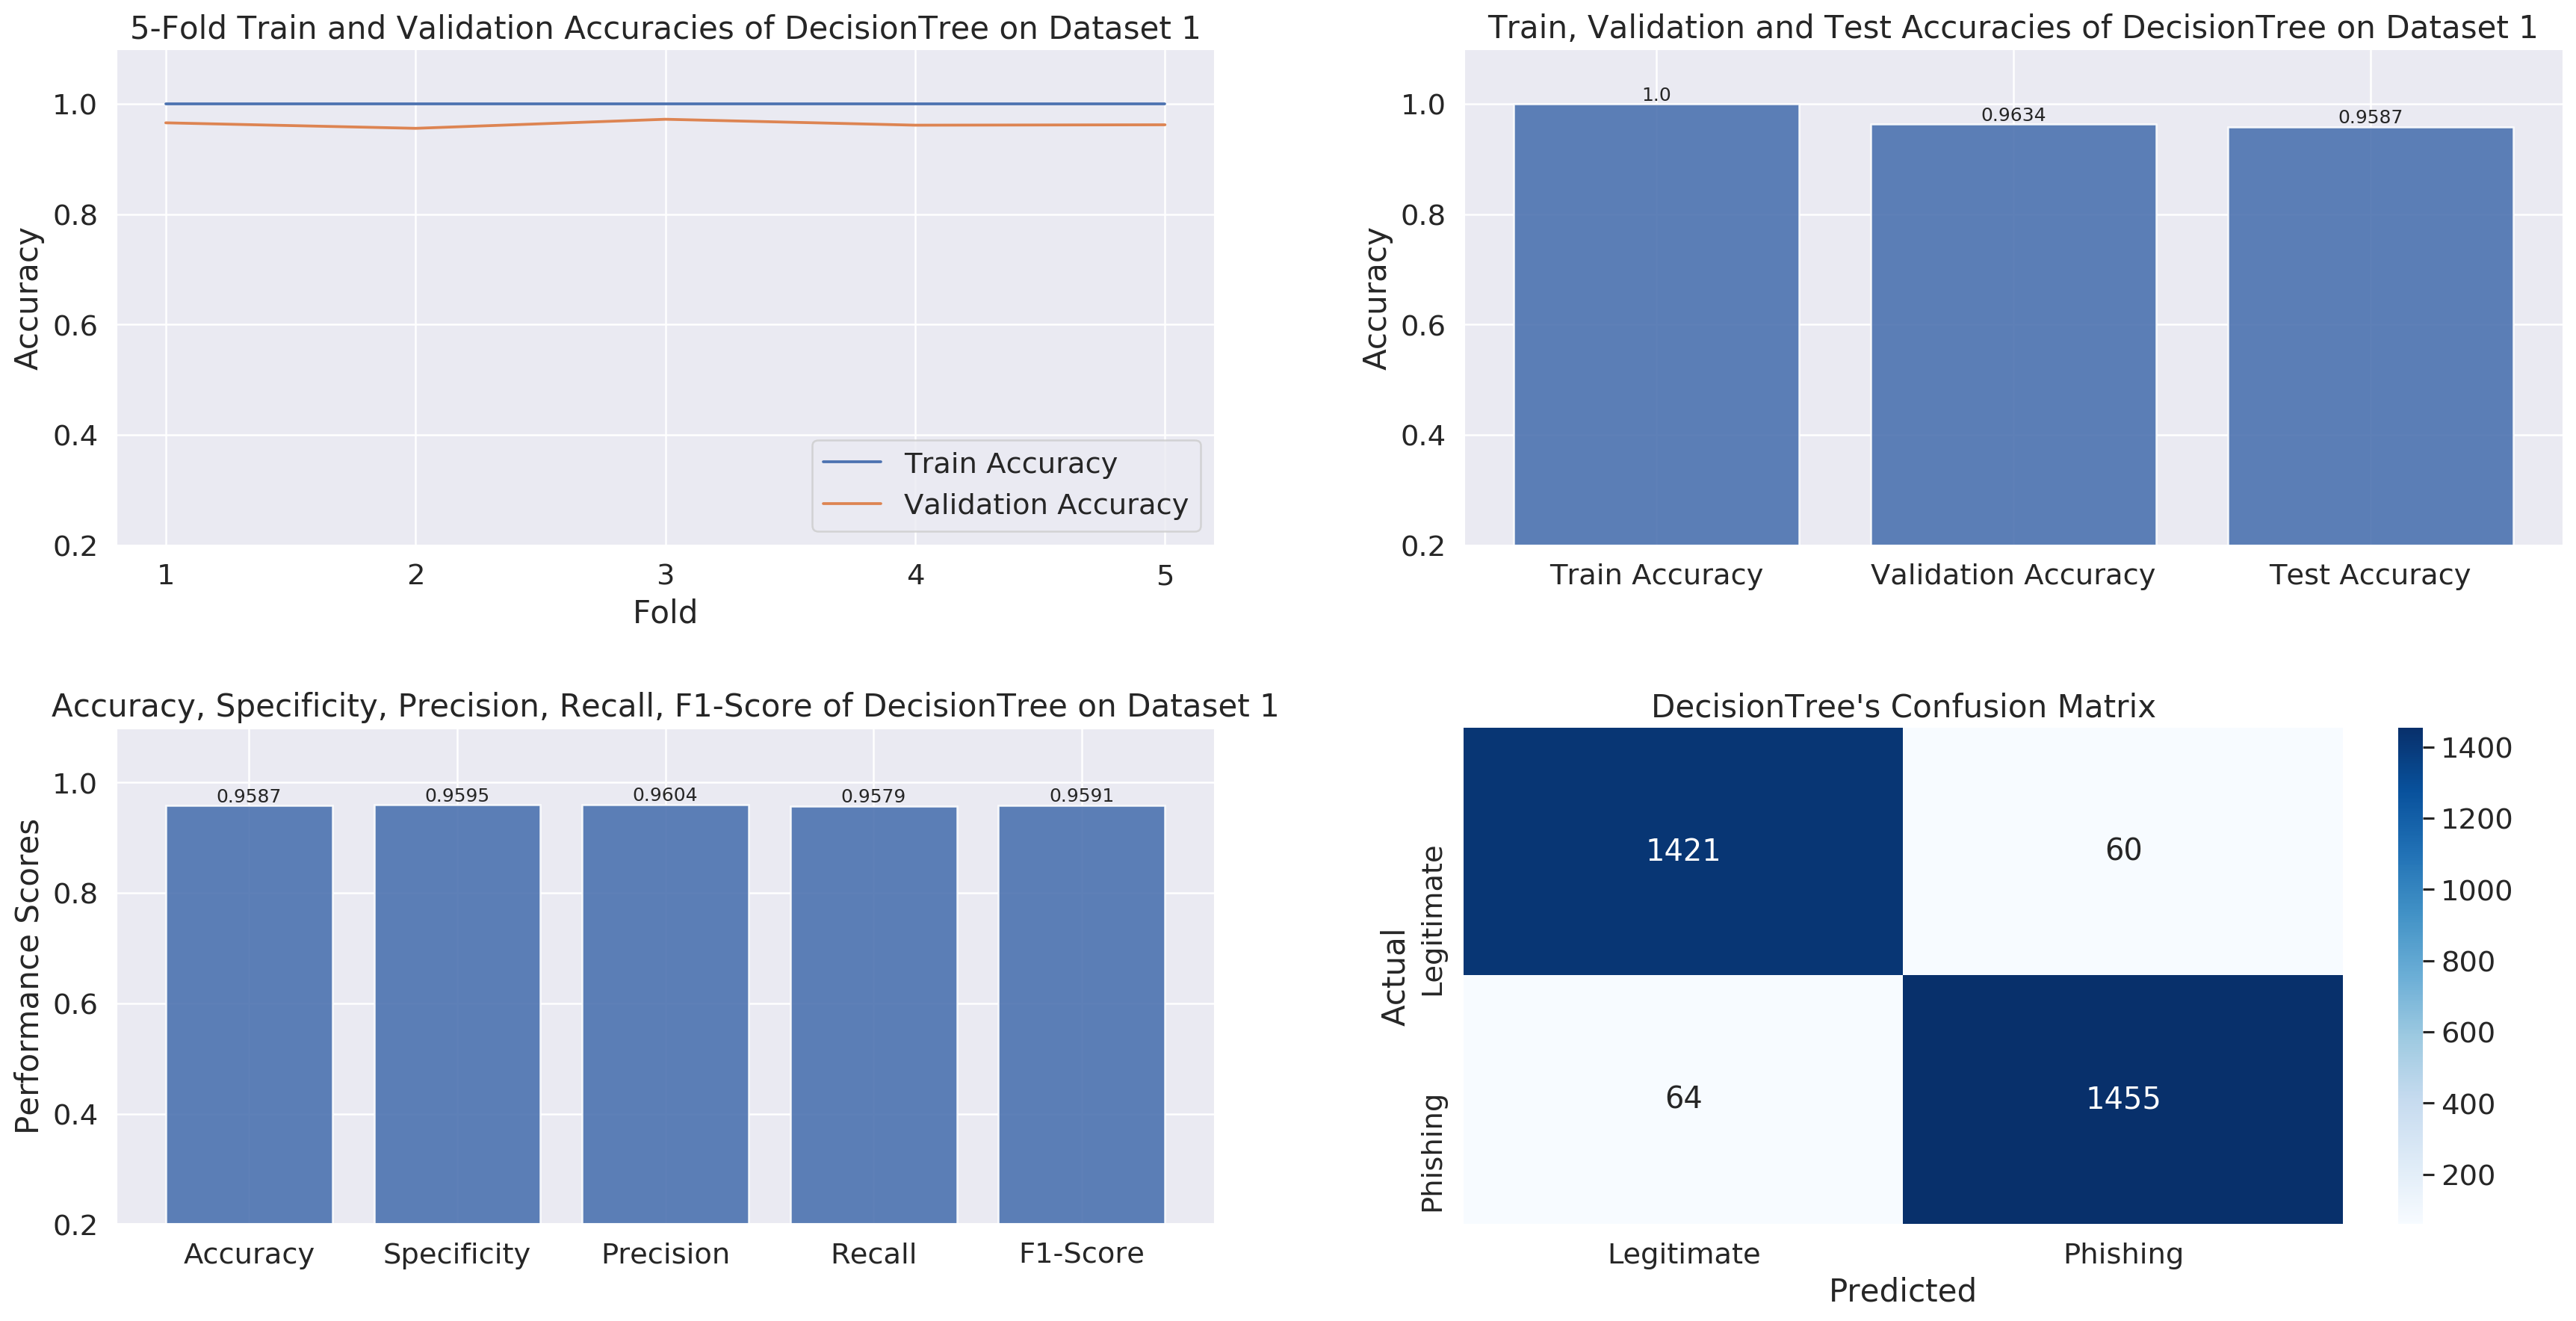

FileNotFoundError: ignored

In [40]:
classifiers = ['DecisionTree', 'SVM', 'RandomForest', 'NaiveBayes', 'KNeighbors', 'Neural Network']
np.random.seed(1)

print('WITH RECURSIVE FEATURE ELIMINATION \n\n')
for i in range(1,4):
    dataset, features_dataset, labels_dataset, feature_names_dataset = get_data(i)
    selected_features, rfecv = RecursiveFeatureElimination(features_dataset, labels_dataset, feature_names_dataset)
    selected_feats = []
    selected_feats = dataset[selected_features].values
    (train, test, train_labels, test_labels) = train_test_split(selected_feats, 
                                                                labels_dataset, test_size=0.3, 
                                                                random_state=np.random.seed(173))
    
    print('Number of features selected by Recursive Feature Elimination for Dataset ' + str(i) + ' are: ' 
          + str(rfecv.n_features_) + '\n')
    for classifier in classifiers:
        if classifier == 'Neural Network':
            
            plot_name = (classifier + '_with_Recursive_Feature_Elimination_on_Dataset_' + str(i))
            print('\nPlease Wait: Training Network ... ')
#             train, test, train_labels, test_labels = Get_Data_Neural_Network(i)
            input_dimensions = rfecv.n_features_
            model = initialize_neural_network(i, input_dimensions)
            
            train_accuracy, validation_accuracy, test_acc, test_conf_mat, dataset_3_confusion_mat = train_evaluate_Neural_Network(i, train, train_labels, test, test_labels)
            
            test_acc, specificity, precision, recall, f1_score = get_scores(test_conf_mat, i)
            if i == 3:
                Get_Plots(classifier, specificity, precision, recall, f1_score, dataset_3_confusion_mat, i, plot_name)
            else: 
                Get_Plots(classifier, specificity, precision, recall, f1_score, test_conf_mat, i, plot_name)
        
        else:
            
            plot_name = (classifier + '_with_Recursive_Feature_Elimination_on_Dataset_' + str(i))
            
            train_accuracy, validation_accuracy, test_confusion_matrix, dataset_3_confusion_mat = train_evaluate_ML_classifier(i, classifier,train, train_labels, test, test_labels)
           
            test_acc, specificity, precision, recall, f1_score = get_scores(test_confusion_matrix, i)
            print('\n\n' + classifier)
            if i == 3:
                Get_Plots(classifier, specificity, precision, recall, f1_score, dataset_3_confusion_mat, i, plot_name)
            else: 
                Get_Plots(classifier, specificity, precision, recall, f1_score, test_confusion_matrix, i, plot_name)
    print('\n\n')

WITH RECURSIVE FEATURE ELIMINATION 


Number of features selected by Recursive Feature Elimination for Dataset 1 are: 39

Time to train NaiveBayeson Dataset 1 is: 0.08588624000549316


NaiveBayes


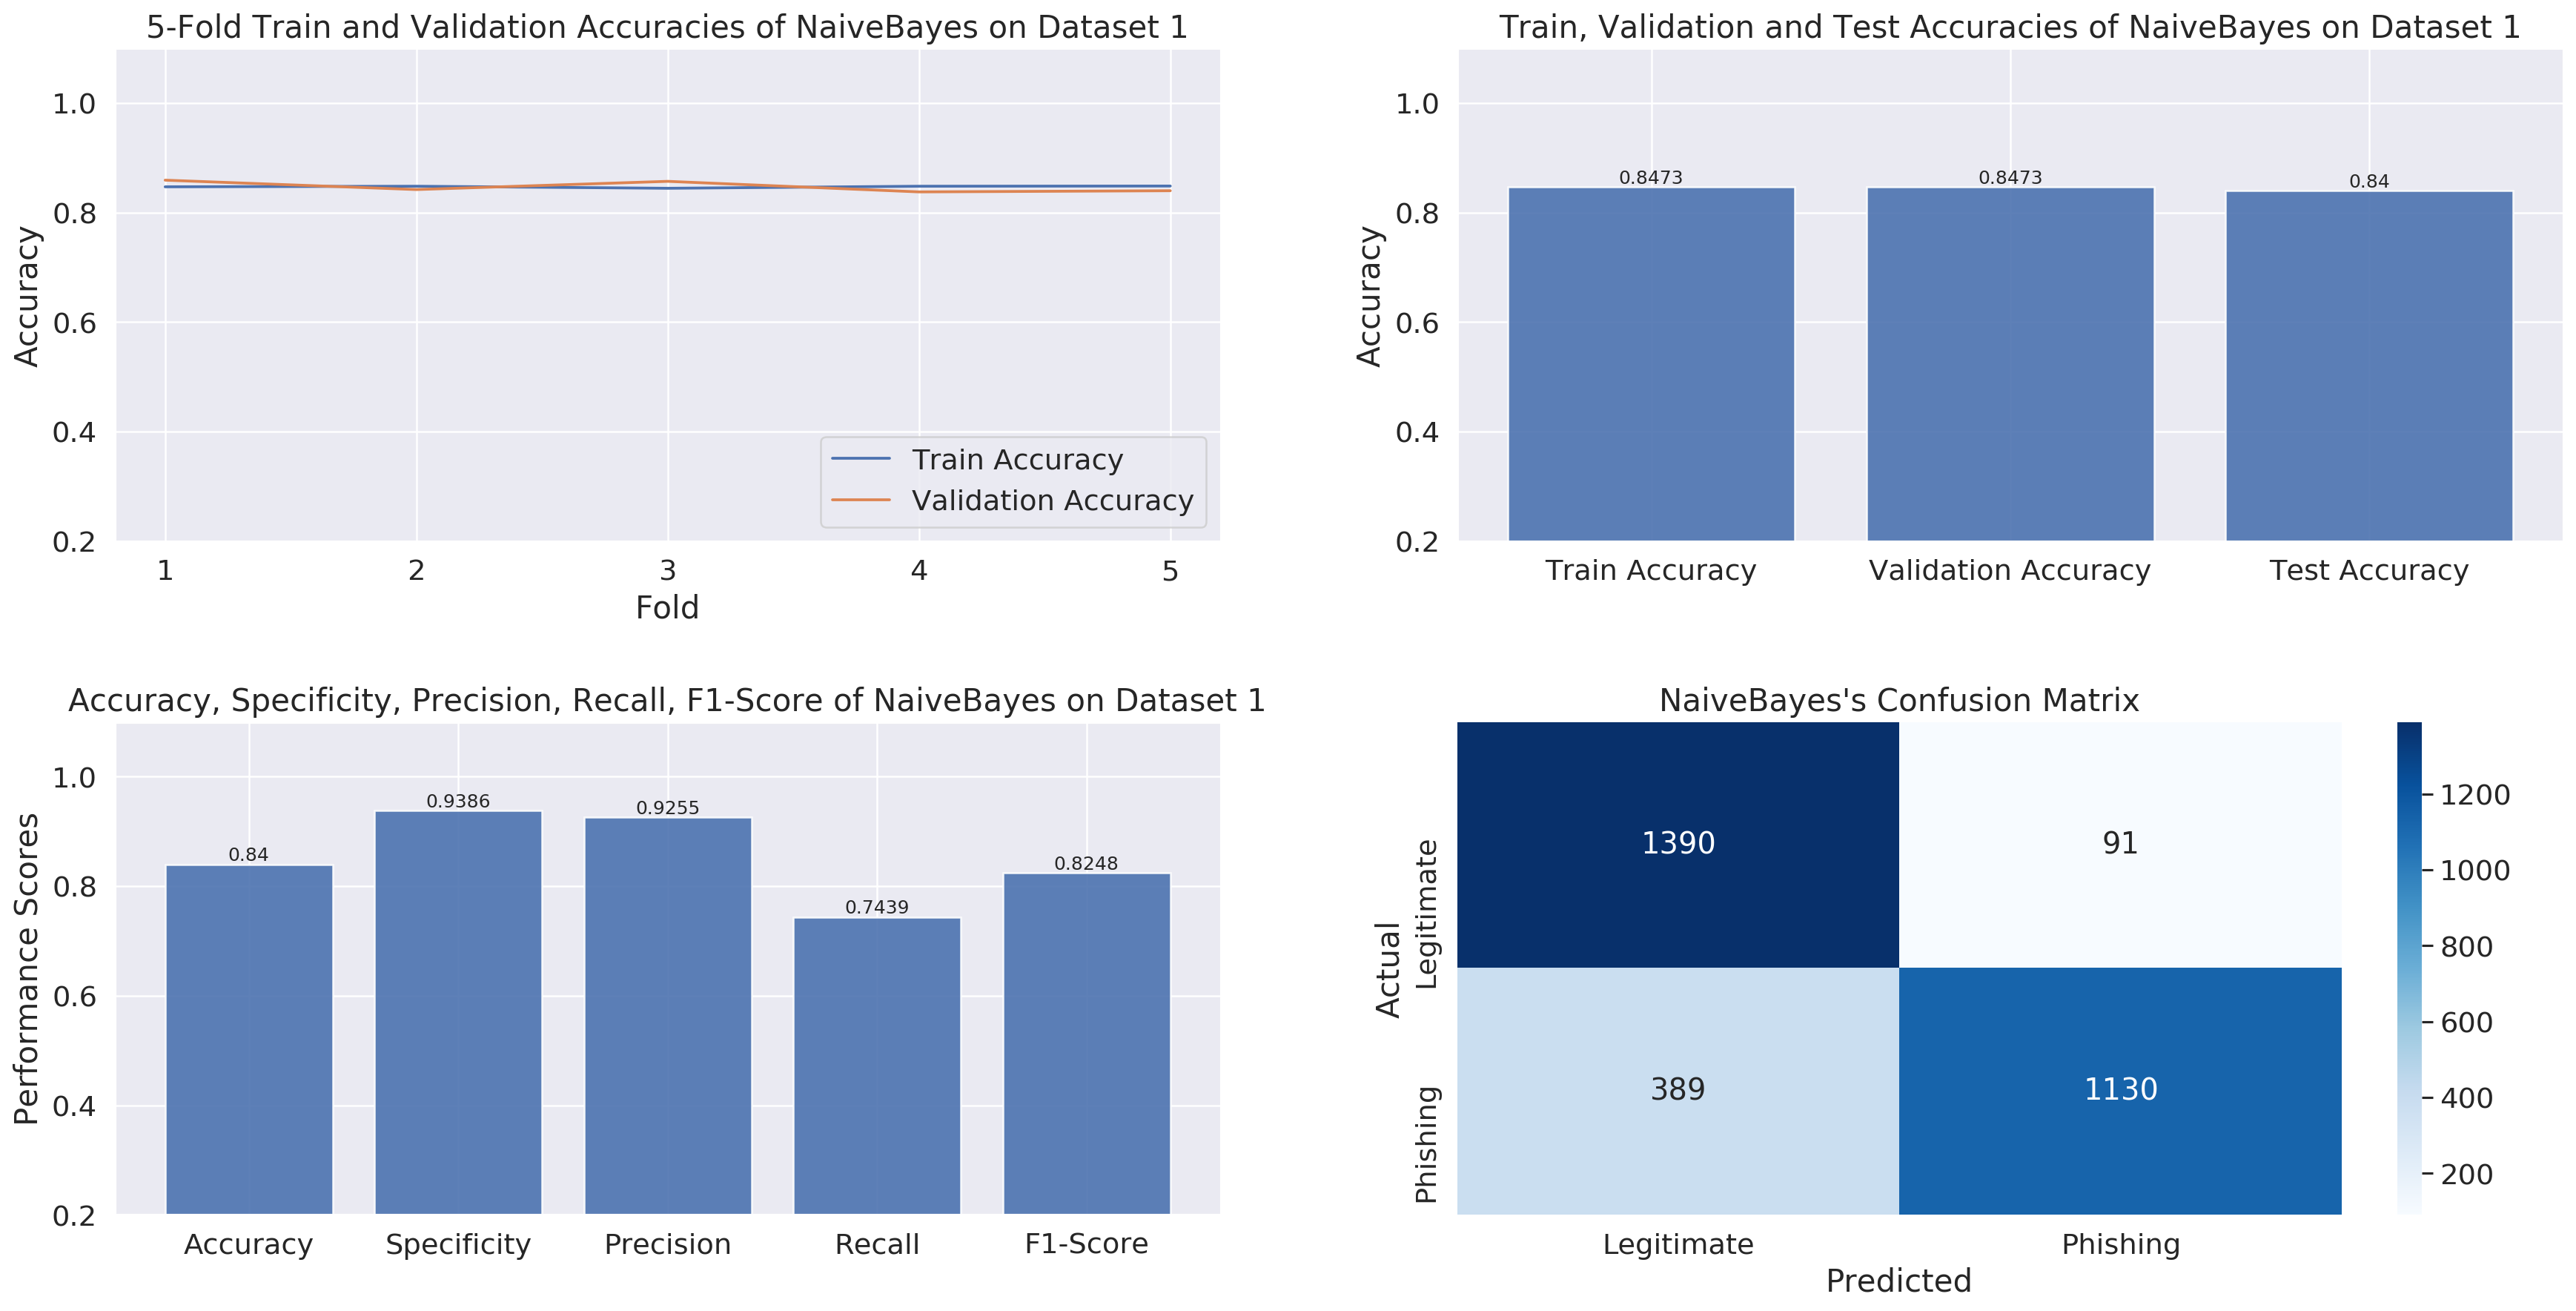

FileNotFoundError: ignored

In [42]:
classifiers = ['NaiveBayes', 'KNeighbors']
np.random.seed(1)

print('WITH RECURSIVE FEATURE ELIMINATION \n\n')
for i in range(1,4):
    dataset, features_dataset, labels_dataset, feature_names_dataset = get_data(i)
    selected_features, rfecv = RecursiveFeatureElimination(features_dataset, labels_dataset, feature_names_dataset)
    selected_feats = []
    selected_feats = dataset[selected_features].values
    (train, test, train_labels, test_labels) = train_test_split(selected_feats, 
                                                                labels_dataset, test_size=0.3, 
                                                                random_state=np.random.seed(173))
    
    print('Number of features selected by Recursive Feature Elimination for Dataset ' + str(i) + ' are: ' 
          + str(rfecv.n_features_) + '\n')
    for classifier in classifiers:
        if classifier == 'Neural Network':
            
            plot_name = (classifier + '_with_Recursive_Feature_Elimination_on_Dataset_' + str(i))
            print('\nPlease Wait: Training Network ... ')
#             train, test, train_labels, test_labels = Get_Data_Neural_Network(i)
            input_dimensions = rfecv.n_features_
            model = initialize_neural_network(i, input_dimensions)
            
            train_accuracy, validation_accuracy, test_acc, test_conf_mat, dataset_3_confusion_mat = train_evaluate_Neural_Network(i, train, train_labels, test, test_labels)
            
            test_acc, specificity, precision, recall, f1_score = get_scores(test_conf_mat, i)
            if i == 3:
                Get_Plots(classifier, specificity, precision, recall, f1_score, dataset_3_confusion_mat, i, plot_name)
            else: 
                Get_Plots(classifier, specificity, precision, recall, f1_score, test_conf_mat, i, plot_name)
        
        else:
            
            plot_name = (classifier + '_with_Recursive_Feature_Elimination_on_Dataset_' + str(i))
            
            train_accuracy, validation_accuracy, test_confusion_matrix, dataset_3_confusion_mat = train_evaluate_ML_classifier(i, classifier,train, train_labels, test, test_labels)
           
            test_acc, specificity, precision, recall, f1_score = get_scores(test_confusion_matrix, i)
            print('\n\n' + classifier)
            if i == 3:
                Get_Plots(classifier, specificity, precision, recall, f1_score, dataset_3_confusion_mat, i, plot_name)
            else: 
                Get_Plots(classifier, specificity, precision, recall, f1_score, test_confusion_matrix, i, plot_name)
    print('\n\n')